In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

filepath = 'C:\\Users\\harry\\OneDrive\\!University\\3. Third\\AerodynamicsPropulsion\\2D Aerofoil\\Part 2\\General\\'
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Create Aerofoils

Load the `NACA 0010`aerofoil data.

In [2]:
Base = np.array(pd.read_excel(filepath + 'NACA0010.xlsx'))

Plot of the base aerofoil.

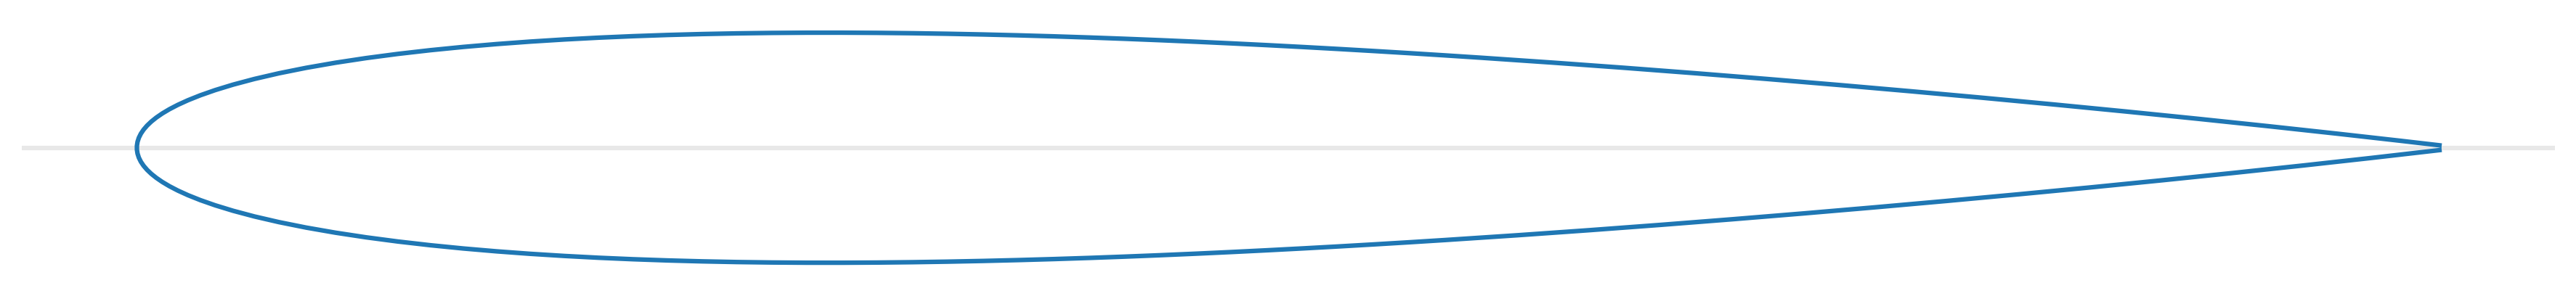

In [3]:
fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')
ax.plot(Base[:,0], Base[:,1])
ax.axhline(0,c='#d3d3d3', zorder=0, alpha=0.5)
ax.set_aspect(1)
ax.axis('Off');

Input the two additional thicknesses required.

In [4]:
Foil1, Foil2 = np.copy(Base), np.copy(Base)
print('Enter thicknesses without percentage symbol')
Thick1 = float(input())
Thick2 = float(input())

Foil1[:,1] *= Thick1/10
Foil2[:,1] *= Thick2/10

Enter thicknesses without percentage symbol
9
12


Plot the 10%, {{Thick1}}% and {{Thick2}}% thick aerofoils.

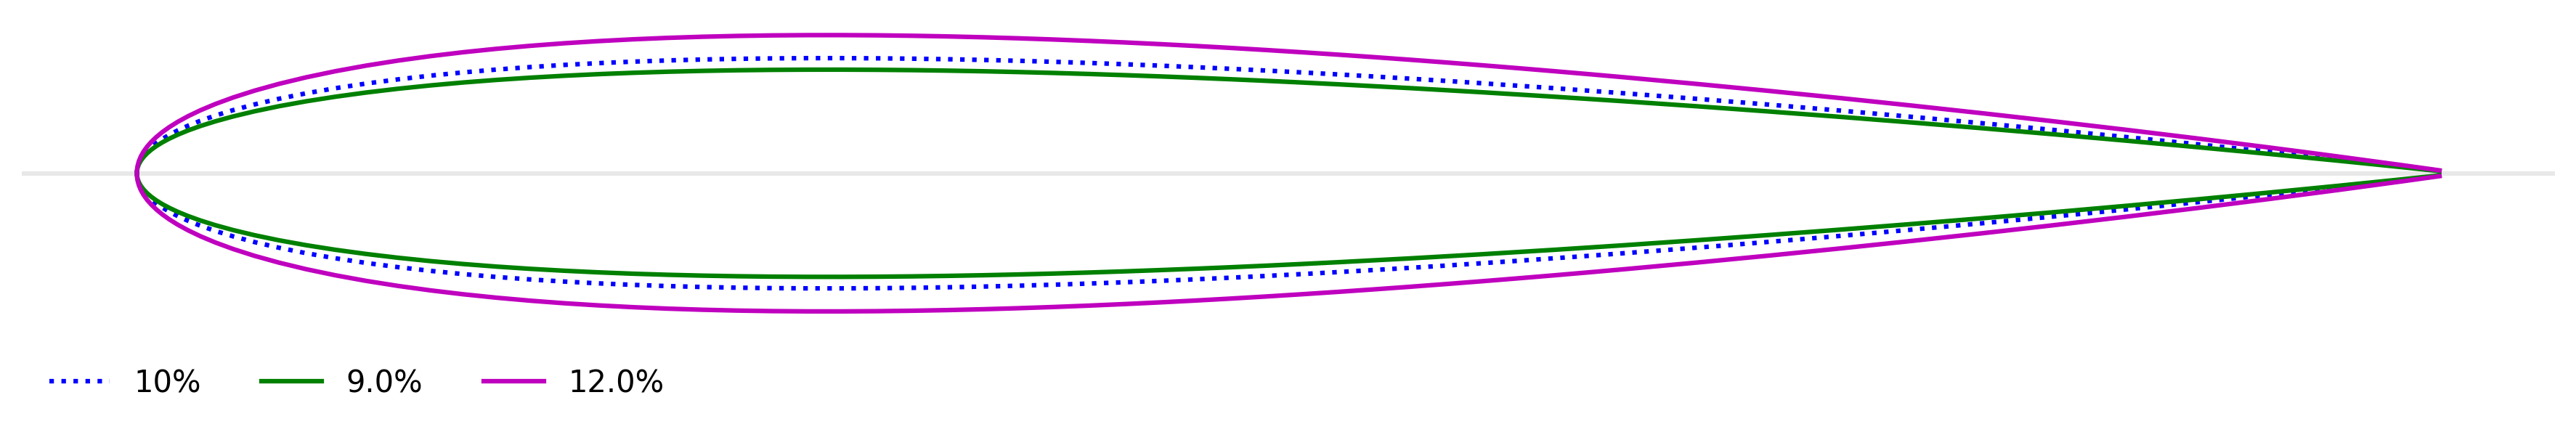

In [5]:
fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')
ax.plot(Base[:,0], Base[:,1], 'b:', label='10%')
ax.plot(Foil1[:,0], Foil1[:,1], 'g', label=str(Thick1)+'%')
ax.plot(Foil2[:,0], Foil2[:,1], 'm', label=str(Thick2)+'%')
ax.axhline(0,c='#d3d3d3', zorder=0, alpha=0.5)
ax.set_aspect(1)
ax.axis('Off')
ax.legend(frameon=False, ncol=3, loc='upper left', bbox_to_anchor=(0,-0.05));

Function that returns the $y$ value of a camber line with maximum camber, $a$, at location $b$ for a given $x$ value.

In [6]:
print('Input a and then b for the required camber line.')
a = float(input())
b = float(input())
x = np.linspace(0,1,100)
y = np.zeros(100)

def get_y(x_loc, x_max=b, max_c=a):
    if x_loc<(x_max):
        y = max_c*(2*(x_loc/x_max)-pow((x_loc/x_max),2))
        theta = np.arctan(((2*max_c)/x_max) - ((2*max_c)/(x_max**2))*x_loc)
    else:
        y = max_c*(2*((1-x_loc)/(1-x_max))-pow(((1-x_loc)/(1-x_max)),2))
        theta = np.arctan(((2*max_c*x_max)/(x_max-1)**2) - ((2*max_c)/((x_max-1)**2))*x_loc)
        
    return y, theta

for i in range(len(x)):
    y[i] = get_y(x[i])[0]

Input a and then b for the required camber line.
0.025
0.28


For each $x$ location of the aerofoil, add the corresponding camber value.

In [7]:
for i in range(len(Base)):
    #Base
    Base[i][0] = Base[i][0] - Base[i][1]*np.sin(get_y(Base[i][0])[1])
    Base[i][1] = get_y(Base[i][0])[0] + Base[i][1]*np.cos(get_y(Base[i][0])[1])
    #Thick 1
    Foil1[i][0] = Foil1[i][0] - Foil1[i][1]*np.sin(get_y(Foil1[i][0])[1])
    Foil1[i][1] = get_y(Foil1[i][0])[0] + Foil1[i][1]*np.cos(get_y(Foil1[i][0])[1])
    #Thick 2
    Foil2[i][0] = Foil2[i][0] - Foil2[i][1]*np.sin(get_y(Foil2[i][0])[1])
    Foil2[i][1] = get_y(Foil2[i][0])[0] + Foil2[i][1]*np.cos(get_y(Foil2[i][0])[1])

Plot the resulting cambered aerofoils.

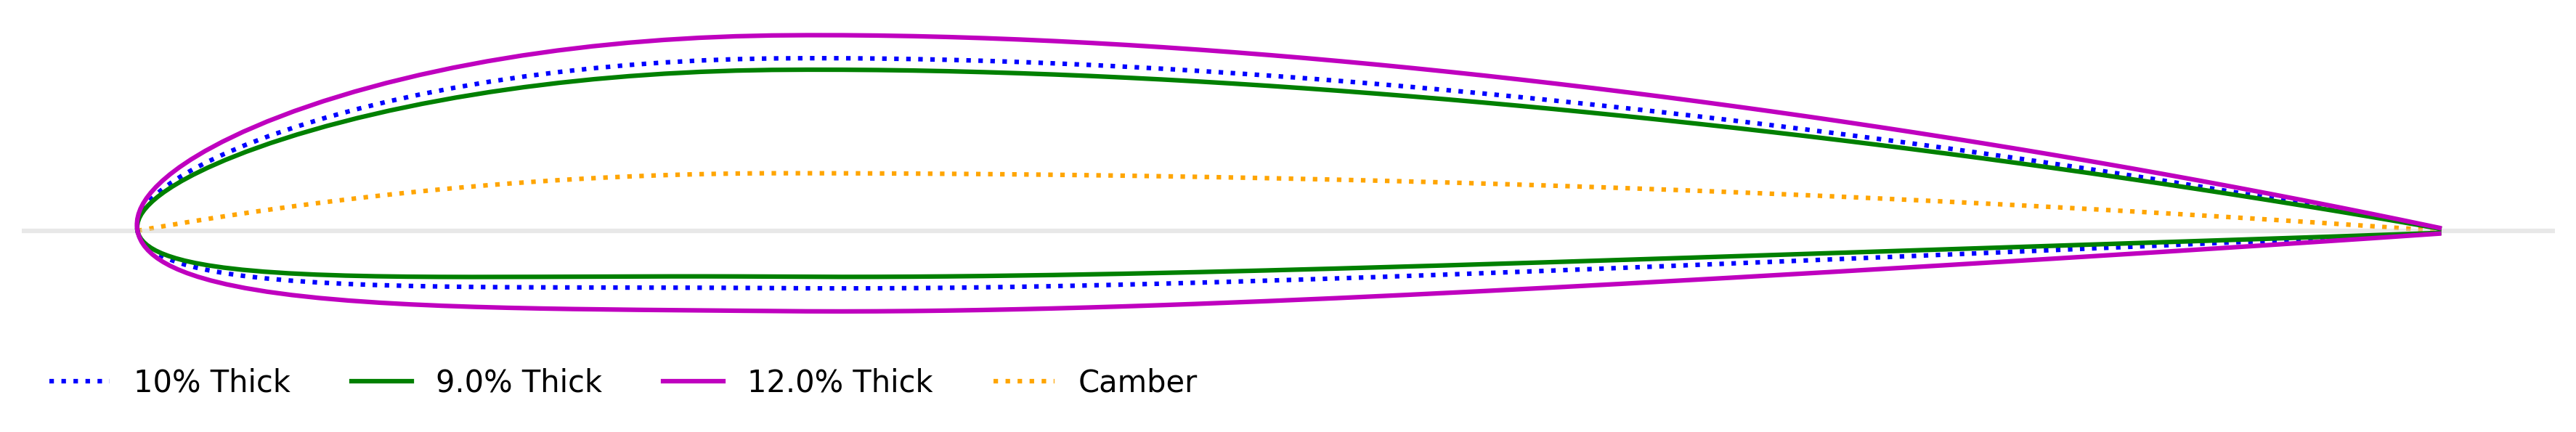

In [8]:
fig, ax = plt.subplots(dpi=300, figsize=(15,2), facecolor='white')

ax.plot(Base[:,0], Base[:,1], 'b:', label='10% Thick')
ax.plot(Foil1[:,0], Foil1[:,1], 'g', label=str(Thick1)+'% Thick')
ax.plot(Foil2[:,0], Foil2[:,1], 'm', label=str(Thick2)+'% Thick')

ax.plot(x,y, c='orange', zorder=0, ls=':', label='Camber')
ax.axhline(0,c='#d3d3d3', zorder=0, alpha=0.5)
ax.set_aspect(1)
ax.legend(frameon=False, ncol=4, loc='upper left', bbox_to_anchor=(0, -0.05))
ax.axis('Off');

Export aerofoil coordinates into `.prn` file for use in `XFOIL`.

In [29]:
np.savetxt(filepath+'Foil1.prn', Foil1, delimiter=' ')
np.savetxt(filepath+'Foil2.prn', Foil2, delimiter=' ')

## Run `XFOIL` Analysis

In [30]:
input_file = 'xfoil_input.txt'

# Remove existing files.
if os.path.exists(filepath+input_file):
    os.remove(filepath+input_file)
if os.path.exists(filepath+'Foil1.txt'):
    os.remove(filepath+'Foil1.txt')
if os.path.exists(filepath+'Foil2.txt'):
    os.remove(filepath+'Foil2.txt')
# File of commands to run.
fid = open(filepath+input_file,'w')
fid.write('load Foil1.prn'+'\n' + str(Thick1)+'% Thick' +'\n')
fid.write('oper'+'\n')
fid.write('pacc 1'+'\n'+'Foil1.txt'+'\n\n')
fid.write('aseq -10 10 1'+'\n')
fid.write('pacc 1' + '\n\n\n')
fid.write('load Foil2.prn'+'\n' + str(Thick2)+'% Thick' +'\n')
fid.write('oper'+'\n')
fid.write('pacc 2'+'\n'+'Foil2.txt'+'\n\n')
fid.write('aseq -10 10 1'+'\n')
fid.write('pacc 1' + '\n\n\n')
fid.close()

# Run the Commands
os.system("xfoil.exe < xfoil_input.txt");

## Analysis

Load the `XFOIL` analysis data into data arrays.

In [10]:
Data1 = pd.read_csv(filepath+'Foil1.txt', skiprows=10, delim_whitespace=True)
Data2 = pd.read_csv(filepath+'Foil2.txt', skiprows=10, delim_whitespace=True)

Data1.drop([0], inplace=True)
Data2.drop([0], inplace=True)

Data1 = Data1.astype(float)
Data2 = Data2.astype(float)

Plot $C_L$ and $C_M$ vs $alpha$.

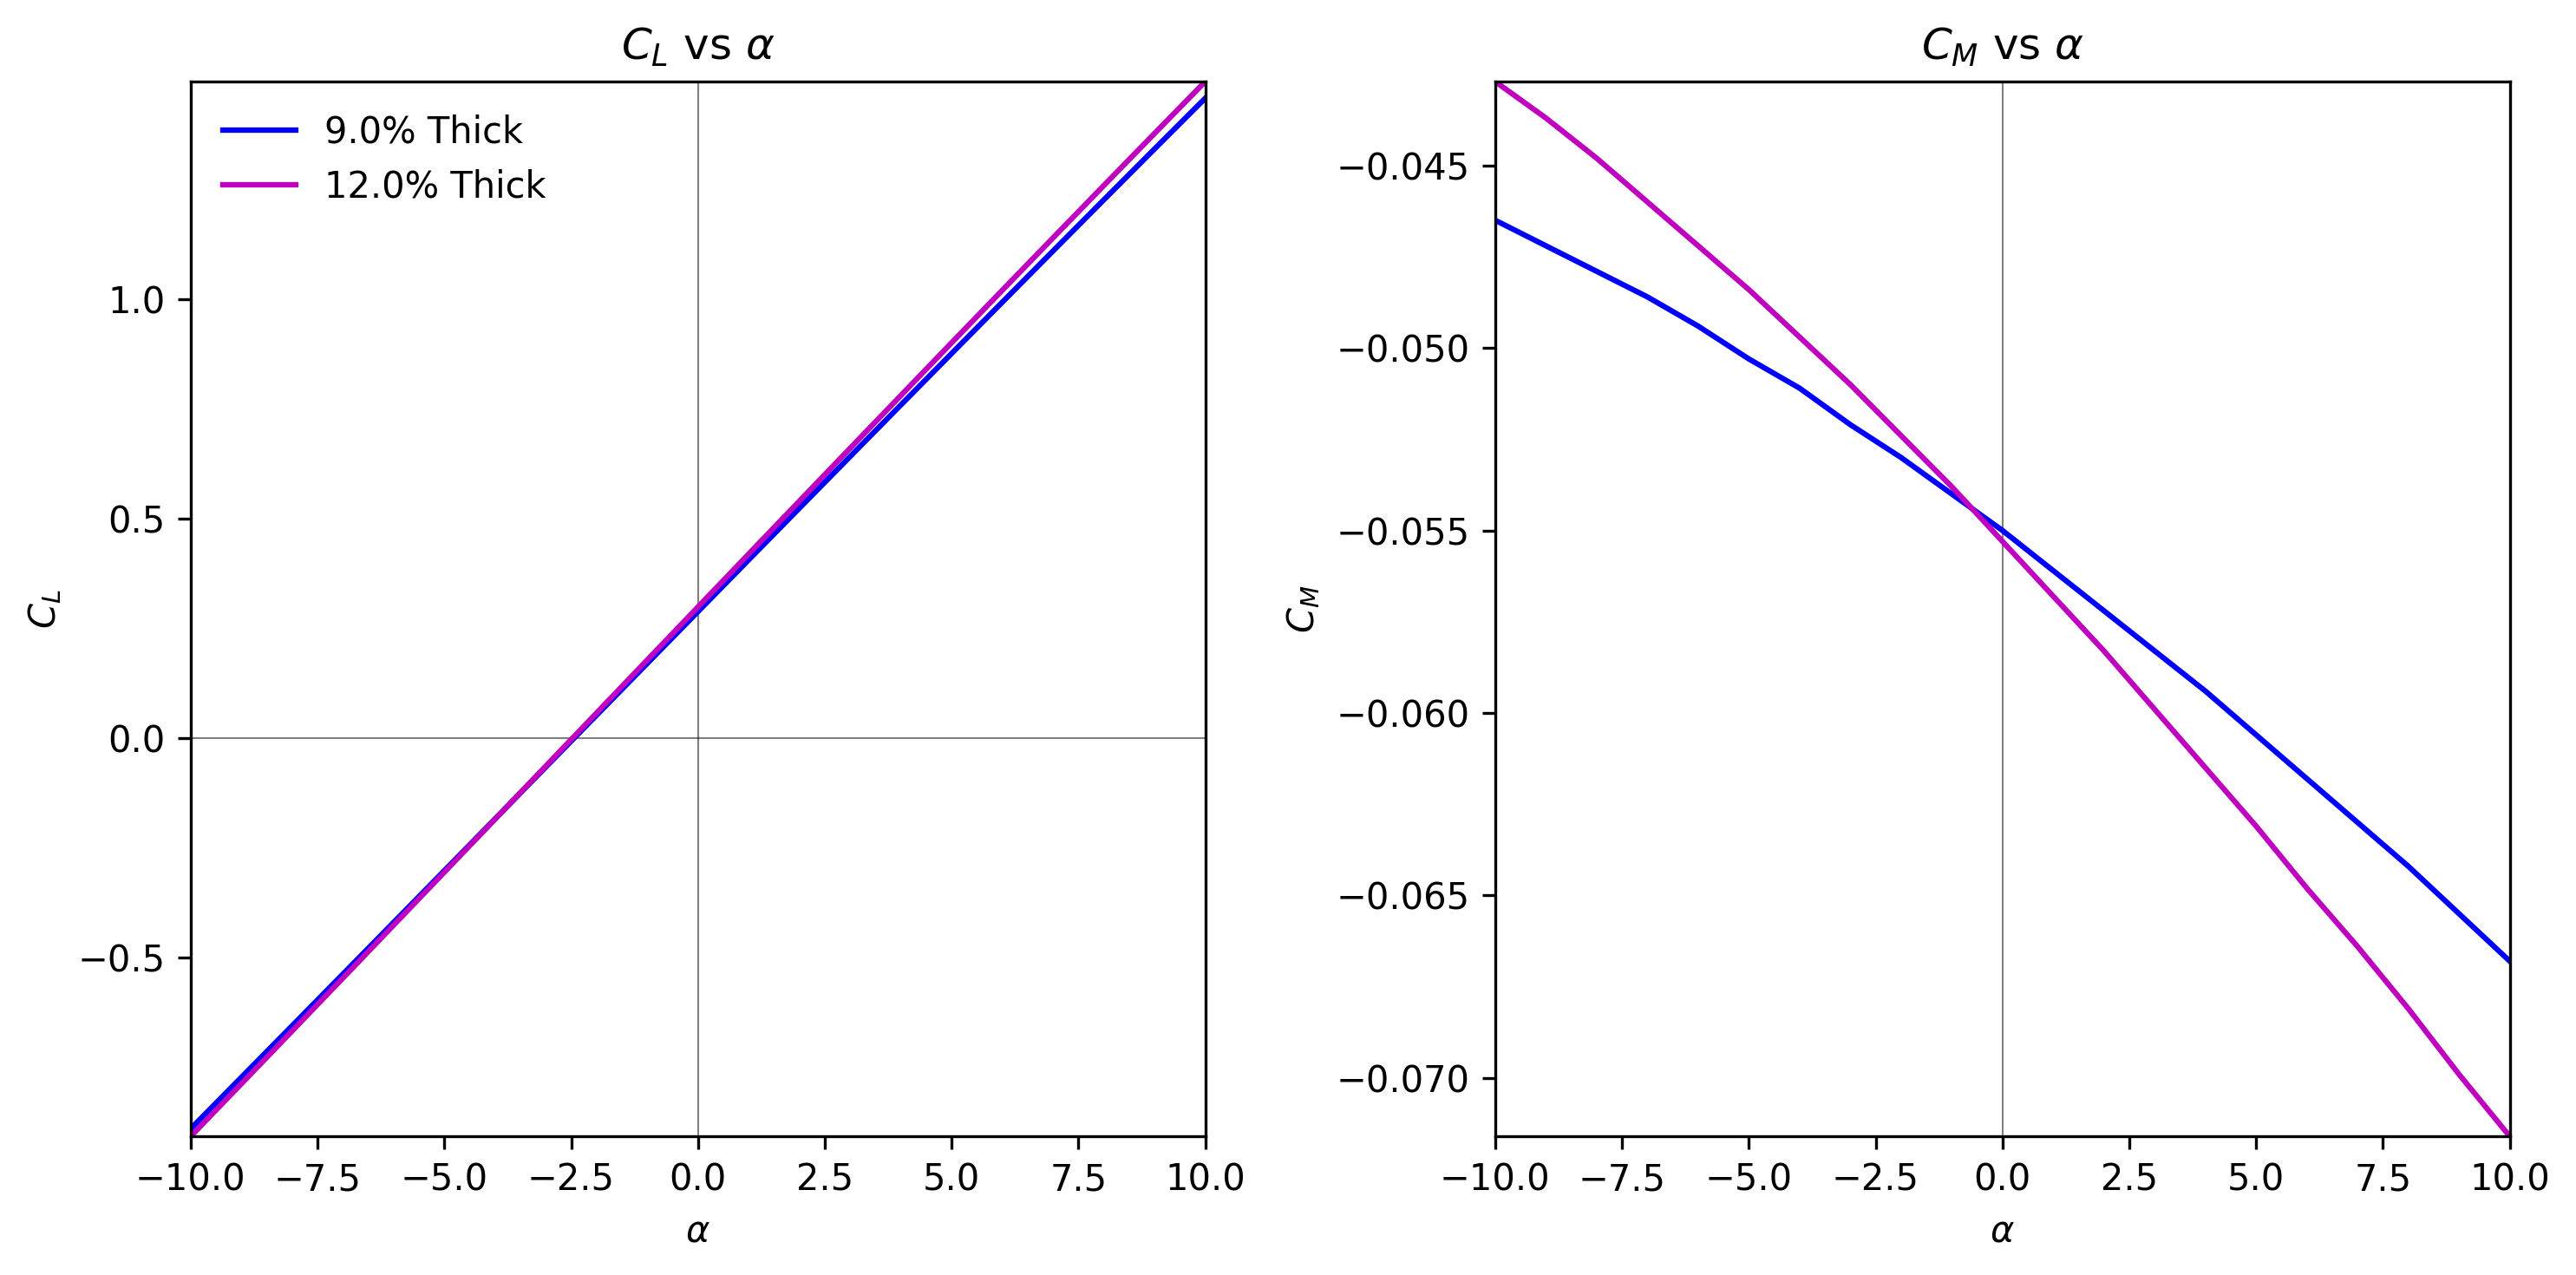

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,5), dpi=300, facecolor='white')
ax[0].plot(Data1['alpha'], Data1['CL'], c='b', label=str(Thick1)+'% Thick')
ax[0].plot(Data2['alpha'], Data2['CL'], c='m', label=str(Thick2)+'% Thick')

ax[1].plot(Data1['alpha'], Data1['CM'], c='b')
ax[1].plot(Data2['alpha'], Data2['CM'], c='m')

ax[0].legend(frameon=False)
ax[0].axvline(0,c='k', lw=0.5, zorder=0, alpha=0.5)
ax[0].axhline(0,c='k', lw=0.5, zorder=0, alpha=0.5)

ax[1].axvline(0,c='k', lw=0.5, zorder=0, alpha=0.5)

ax[0].set_title(r'$C_L$ vs $\alpha$')
ax[1].set_title(r'$C_M$ vs $\alpha$')

ax[0].set_xlabel(r'$\alpha$'), ax[1].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'$C_L$'), ax[1].set_ylabel(r'$C_M$')
ax[0].margins(0), ax[1].margins(0)
plt.tight_layout();

$\alpha_0$ is the incidence angle which produces zero lift. This can be calculated by considering the equation of the line and the $x$ value at $y=0$.

In [14]:
alpha_1 = -np.polyfit(Data1['alpha'],Data1['CL'],1)[1]/np.polyfit(Data1['alpha'],Data1['CL'],1)[0]
alpha_2 = -np.polyfit(Data2['alpha'],Data2['CL'],1)[1]/np.polyfit(Data2['alpha'],Data2['CL'],1)[0]

The result is the the {{Thick1}}% thick aerofoil has an $\alpha_0$ of {{"%.3f"%alpha_1}} degrees and the {{Thick2}}% thick aerofoil an $\alpha_0$ of {{"%.3f"%alpha_2}} degrees. These can be written as {{"%.4f" %np.radians(alpha_1)}} radians and {{"%.4f" %np.radians(alpha_2)}} radians.

For the quarter chord pitching moment we will consider the value of $C_M$ at the aerofoils $\alpha_0$.

We will use a 3rd order polynomial curve fit to the data points to find the required value.

In [15]:
tck_1 = interpolate.splrep(Data1['alpha'],Data1['CM'], s=1, k=3)
tck_2 = interpolate.splrep(Data2['alpha'],Data2['CM'], s=1, k=3)

x_spline = np.arange(-10,10,1/1000)
y_1 = interpolate.splev(x_spline, tck_1, der=0)
y_2 = interpolate.splev(x_spline, tck_2, der=0)

pitching_1 = interpolate.splev(alpha_1, tck_1, der=0)
pitching_2 = interpolate.splev(alpha_2, tck_2, der=0)

Plot of the original data, the new polynomial curve and the locations of $C_{M,0.25}$.

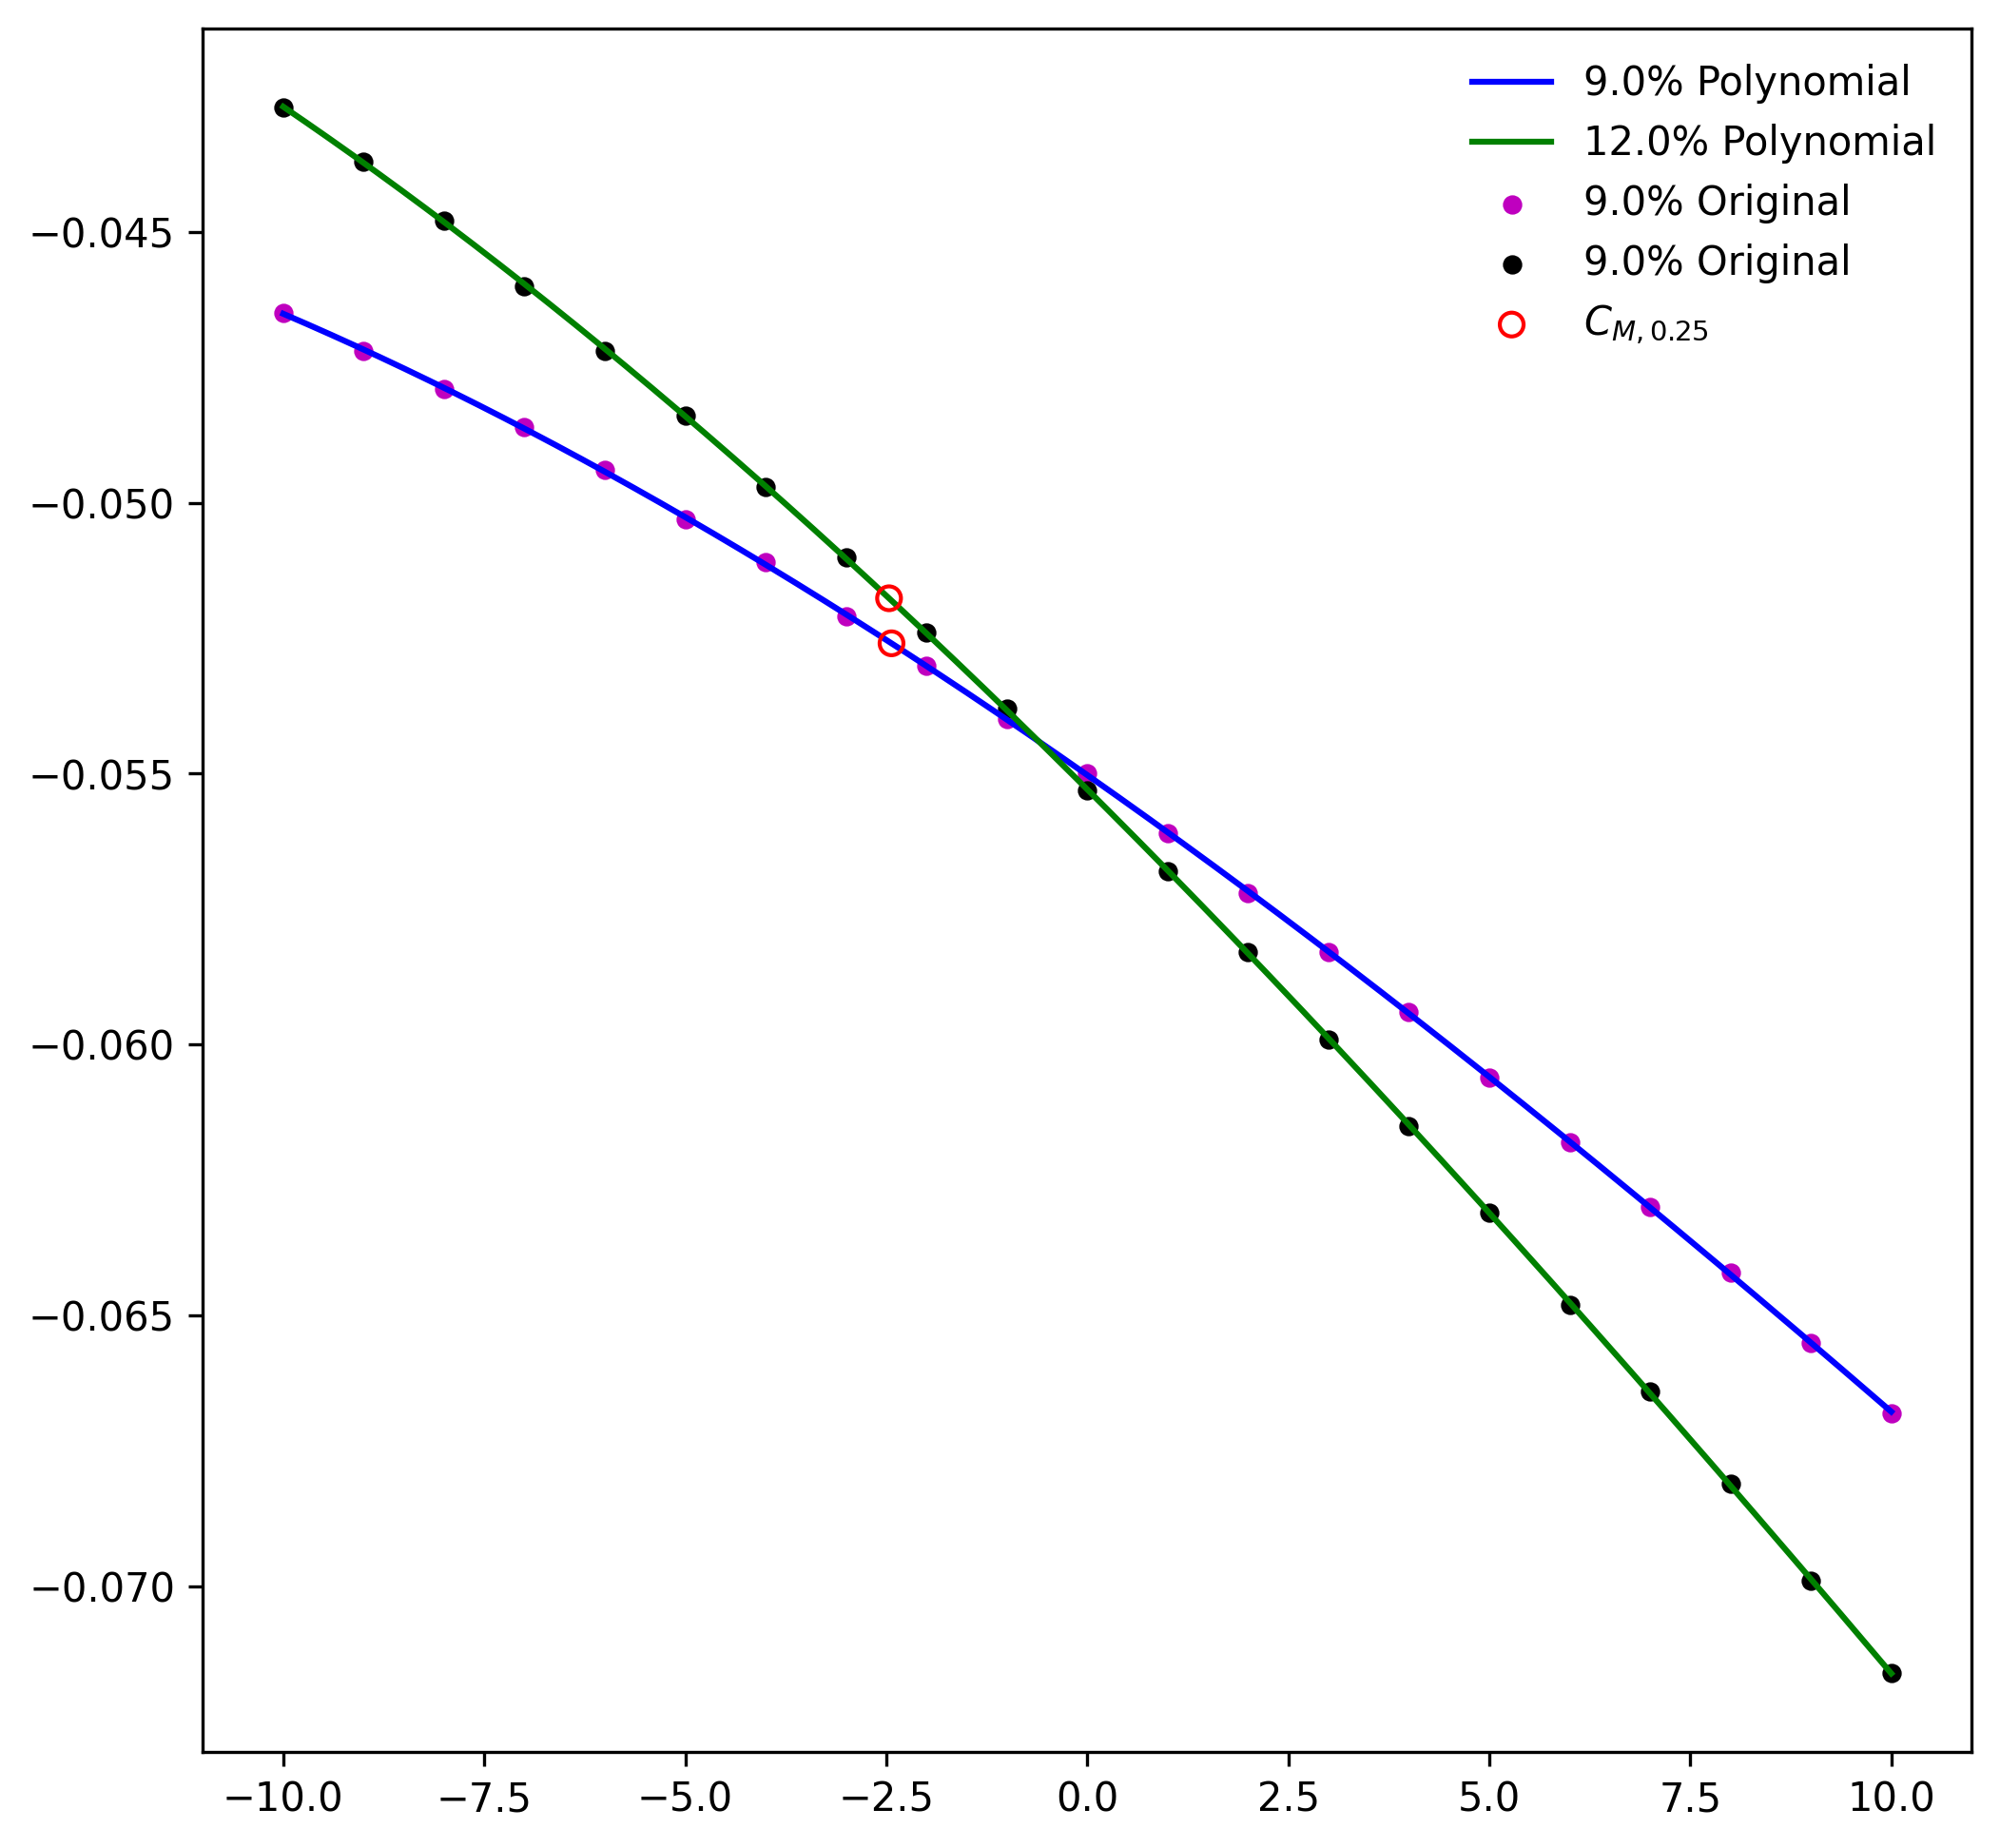

In [35]:
fig, ax = plt.subplots(figsize=(8,8), facecolor='white', dpi=300)
# Spline Plots
ax.plot(x_spline, y_1, 'b', label=str(Thick1)+'% Polynomial')
ax.plot(x_spline, y_2, 'g', label=str(Thick2)+'% Polynomial')
# Original Data Plot
ax.scatter(Data1['alpha'], Data1['CM'],c='m', s=15, label=str(Thick1)+'% Original')
ax.scatter(Data1['alpha'], Data2['CM'],c='k', s=15, label=str(Thick1)+'% Original' )
# Cm Location
ax.scatter([alpha_1,alpha_2],[pitching_1,pitching_2], zorder=10, edgecolors='r', facecolors='none', label='$C_{M,0.25}$')
ax.legend(frameon=False);

The completed spline allows $C_M$ to be found at anypoint. The results are a pitching moment of {{"%.4f"%pitching_1.item()}} for the {{Thick1}}% thick aerofoil and a pitching moment of {{"%.4f"%pitching_2.item()}} for the {{Thick2}}% thick aerofoil.